In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()

In [33]:
# content_df = pd.read_csv('../services/backend/seed_data/data/nov_19_dump/content.csv')
# eng_df = pd.read_csv('../services/backend/seed_data/data/nov_19_dump/engagement.csv')
# content_meta_df = pd.read_csv('../services/backend/seed_data/data/nov_19_dump/generated_content_metadata.csv')

In [34]:
# content_df = pd.read_csv(r"C:\Users\musma\Documents\Usman Hamid\Important\Columbia University_MSBA\Courses\Modern Recommendation Systems\Data\content.csv")
# eng_df = pd.read_csv(r"C:\Users\musma\Documents\Usman Hamid\Important\Columbia University_MSBA\Courses\Modern Recommendation Systems\Data\engagement.csv")
# content_meta_df = pd.read_csv(r"C:\Users\musma\Documents\Usman Hamid\Important\Columbia University_MSBA\Courses\Modern Recommendation Systems\Data\generated_content_metadata.csv")

In [5]:
content_df = pd.read_csv("../services/backend/seed_data/data/nov_19_dump/content.csv")
eng_df = pd.read_csv("../services/backend/seed_data/data/nov_19_dump/engagement.csv")
content_meta_df = pd.read_csv("../services/backend/seed_data/data/nov_19_dump/generated_content_metadata.csv")

In [6]:
content_df

,id,media_type,s3_bucket,s3_id,created_date,author_id
0,28598,Image,columbia-e4579-prod-bucket,generated_images/txt2img_movies/Prestige-The/7...,2022-11-03 21:55:57,1
1,28599,Image,columbia-e4579-prod-bucket,generated_images/txt2img_movies/Prestige-The/7...,2022-11-03 21:55:57,1
2,28600,Image,columbia-e4579-prod-bucket,generated_images/txt2img_movies/Prestige-The/7...,2022-11-03 21:55:57,1
3,28601,Image,columbia-e4579-prod-bucket,generated_images/txt2img_movies/Prestige-The/7...,2022-11-03 21:55:57,1
4,28602,Image,columbia-e4579-prod-bucket,generated_images/txt2img_movies/Prestige-The/7...,2022-11-03 21:55:57,1
...,...,...,...,...,...,...
107700,136300,Image,columbia-e4579-prod-bucket,generated_images/txt2img_poems/A Dream by Edga...,2022-11-03 22:10:12,1
107701,136301,Image,columbia-e4579-prod-bucket,generated_images/txt2img_poems/Romance by Edga...,2022-11-03 22:10:12,1
107702,136302,Image,columbia-e4579-prod-bucket,generated_images/txt2img_poems/The Lake by Edg...,2022-11-03 22:10:12,1
107703,136303,Image,columbia-e4579-prod-bucket,generated_images/txt2img_poems/Hymn To Aristog...,2022-11-03 22:10:12,1


In [7]:
eng_df

,id,user_id,content_id,engagement_type,engagement_value,created_date
0,159,1,38318,MillisecondsEngagedWith,2750,2022-11-03 22:49:22
1,160,1,74487,MillisecondsEngagedWith,2150,2022-11-03 22:49:29
2,161,1,78133,MillisecondsEngagedWith,3684,2022-11-03 22:49:33
3,162,1,80916,MillisecondsEngagedWith,3784,2022-11-03 22:49:37
4,163,1,89403,MillisecondsEngagedWith,2000,2022-11-03 22:49:39
...,...,...,...,...,...,...
37604,37898,58,122578,MillisecondsEngagedWith,784,2022-11-18 03:59:41
37605,37899,58,122578,Like,1,2022-11-18 03:59:42
37606,37900,20,80003,Like,-1,2022-11-18 03:59:42
37607,37902,58,29900,MillisecondsEngagedWith,826,2022-11-18 03:59:46


In [8]:
len(pd.unique(eng_df['content_id']))

19965

In [9]:
eng_df['engagement_type'].value_counts()

MillisecondsEngagedWith    19895
Like                       17714
Name: engagement_type, dtype: int64

In [10]:
eng_df[eng_df['engagement_type']=='Like']['engagement_value'].unique()

array([ 1, -1])

In [11]:
len(pd.unique(content_meta_df['content_id']))

107705

In [9]:
content_meta_df

,id,content_id,seed,num_inference_steps,guidance_scale,prompt,original_prompt,artist_style,source,source_img,generated_type,model,model_version,prompt_embedding
0,28563,28598,8,75,8,"He show you this object, and pledges to you it...","He show you this object, and pledges to you it...",movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-35.46703071645465, -0.9743458101996368, -6.1..."
1,28564,28599,11,75,7,"Borden fumbles through the darkned area, lit b...","Borden fumbles through the darkned area, lit b...",movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-40.04682603700367, -12.690760596004994, -2.6..."
2,28565,28600,15,75,9,"No, sir. The tank had been used for the first ...","No, sir. The tank had been used for the first ...",movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-46.63712982855746, -5.953706143972863, 5.931..."
3,28566,28601,7,75,8,ANGRY If I reveal my magician's secrets here i...,ANGRY If I reveal my magician's secrets here i...,movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-38.49692616749736, 5.781632904789188, -2.945..."
4,28567,28602,15,75,8,Owens smiles as he hands over his pocket watch...,Owens smiles as he hands over his pocket watch...,movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-45.32947318489459, -9.6602080928961, -3.6819..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107700,136263,136300,18,20,4,In visions of the dark night I have dreamed o...,In visions of the dark night I have dreamed o...,NaN,A Dream by Edgar Allan Poe,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-38.99447407938968, 6.3254878714698295, -15.5..."
107701,136264,136301,18,20,4,"Romance, who loves to nod and sing,With drowsy...","Romance, who loves to nod and sing,With drowsy...",NaN,Romance by Edgar Allan Poe,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-27.800608750936348, 11.61573957821127, -17.0..."
107702,136265,136302,18,20,4,In spring of youth it was my lotTo haunt of th...,In spring of youth it was my lotTo haunt of th...,NaN,The Lake by Edgar Allan Poe,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-33.51881146174197, 15.688159445676009, -14.6..."
107703,136266,136303,18,20,4,"Wreathed in myrtle, my sword I'll conceal, Li...","Wreathed in myrtle, my sword I'll conceal, Li...",NaN,Hymn To Aristogeiton And Harmodius by Edgar Al...,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-23.128207479736822, 0.7002195288462258, -17...."


In [12]:
target_df = pd.read_csv('../services/backend/processed_data/target.csv')
train_df = pd.read_csv('../services/backend/processed_data/train.csv')
test_df = pd.read_csv('../services/backend/processed_data/test.csv')

In [13]:
content_like = target_df.groupby("content_id").mean()["engagement_value"].reset_index()
content_like

,content_id,engagement_value
0,28598,0.0
1,28599,0.0
2,28607,0.5
3,28615,0.0
4,28622,0.0
...,...,...
19960,136268,1.0
19961,136274,0.0
19962,136276,0.0
19963,136280,1.0


In [14]:
content_meta_df = pd.merge(content_meta_df,content_like,on="content_id")
content_meta_df

,id,content_id,seed,num_inference_steps,guidance_scale,prompt,original_prompt,artist_style,source,source_img,generated_type,model,model_version,prompt_embedding,engagement_value
0,28563,28598,8,75,8,"He show you this object, and pledges to you it...","He show you this object, and pledges to you it...",movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-35.46703071645465, -0.9743458101996368, -6.1...",0.0
1,28564,28599,11,75,7,"Borden fumbles through the darkned area, lit b...","Borden fumbles through the darkned area, lit b...",movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-40.04682603700367, -12.690760596004994, -2.6...",0.0
2,28572,28607,14,75,8,A POLICEMAN opens the door for the Judge and C...,A POLICEMAN opens the door for the Judge and C...,movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-41.31700525276726, -1.3223978170843569, 10.4...",0.5
3,28580,28615,7,75,8,"Te library is long and titled, with two long t...","Te library is long and titled, with two long t...",movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-40.16387528183577, 2.0193421174364725, -3.67...",0.0
4,28587,28622,10,75,10,-onto the stage and STEPS/STUMBLES out from be...,-onto the stage and STEPS/STUMBLES out from be...,movie: Prestige-The,Prestige-The,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-57.61354207389324, -4.981055924484977, -0.28...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19960,136231,136268,18,20,4,"The stars may dissolve, and the fountain of li...","The stars may dissolve, and the fountain of li...",NaN,The Irishman's Song by Percy Bysshe Shelley,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-28.789206821086022, 1.5829087017456231, -17....",1.0
19961,136237,136274,18,20,4,Brothers! between you and meWhirlwinds sweep a...,Brothers! between you and meWhirlwinds sweep a...,NaN,To the Republicans of North America by Percy B...,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-32.555772437652045, 6.6959052695711065, -15....",0.0
19962,136239,136276,18,20,4,GONE the wild day:A wilder nightComing makes w...,GONE the wild day:A wilder nightComing makes w...,NaN,Interval by Edward Thomas,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-35.76859447398382, 0.3712491178155554, -7.55...",0.0
19963,136243,136280,18,20,4,"Ah Sunflower, weary of time, Who countest the...","Ah Sunflower, weary of time, Who countest the...",NaN,Ah Sunflower by William Blake,NaN,HumanTxt2Img,StableDiffusion,1.4,"[-10.583487916153643, 14.85790807618464, -14.8...",1.0


In [15]:
content_meta_df_tmp = pd.merge(content_meta_df[["content_id","prompt_embedding"]],target_df,on = "content_id")
content_meta_df_tmp

,content_id,prompt_embedding,user_id,engagement_value
0,28598,"[-35.46703071645465, -0.9743458101996368, -6.1...",14,0.0
1,28599,"[-40.04682603700367, -12.690760596004994, -2.6...",5,0.0
2,28607,"[-41.31700525276726, -1.3223978170843569, 10.4...",20,1.0
3,28607,"[-41.31700525276726, -1.3223978170843569, 10.4...",17,0.0
4,28615,"[-40.16387528183577, 2.0193421174364725, -3.67...",31,0.0
...,...,...,...,...
24334,136274,"[-32.555772437652045, 6.6959052695711065, -15....",43,0.0
24335,136276,"[-35.76859447398382, 0.3712491178155554, -7.55...",6,0.0
24336,136280,"[-10.583487916153643, 14.85790807618464, -14.8...",31,1.0
24337,136302,"[-33.51881146174197, 15.688159445676009, -14.6...",6,0.0


In [19]:
content_meta_df_tmp["prompt_embedding"] = content_meta_df_tmp["prompt_embedding"].apply(lambda x:eval(x))

In [44]:
a = pd.DataFrame(content_meta_df_tmp["prompt_embedding"].tolist())
a = a.add_prefix('prompt_embedding_')
item_features = list(a.columns)
final_df = pd.concat([content_meta_df_tmp,a],axis=1)
final_df = final_df.drop('prompt_embedding', axis=1)
final_df

,content_id,user_id,engagement_value,prompt_embedding_0,prompt_embedding_1,prompt_embedding_2,prompt_embedding_3,prompt_embedding_4,prompt_embedding_5,prompt_embedding_6,...,prompt_embedding_502,prompt_embedding_503,prompt_embedding_504,prompt_embedding_505,prompt_embedding_506,prompt_embedding_507,prompt_embedding_508,prompt_embedding_509,prompt_embedding_510,prompt_embedding_511
0,28598,14,0.0,-35.467031,-0.974346,-6.158938,7.234613,-1.260048,-6.795274,-12.383802,...,3.595988,1.984978,2.922252,4.567685,-1.096733,5.893711,-2.783578,4.575509,-0.988769,-1.563369
1,28599,5,0.0,-40.046826,-12.690761,-2.679638,3.958555,-21.584120,-14.329893,29.576530,...,-1.894507,0.703189,0.813963,-0.354662,2.075341,-6.177231,-4.910490,1.445702,2.596237,3.249212
2,28607,20,1.0,-41.317005,-1.322398,10.438989,4.421970,-8.655111,-6.234160,-4.241880,...,1.413756,-2.598152,-1.811588,6.996786,-0.240460,2.056159,-3.108406,-1.636715,-1.964963,1.677808
3,28607,17,0.0,-41.317005,-1.322398,10.438989,4.421970,-8.655111,-6.234160,-4.241880,...,1.413756,-2.598152,-1.811588,6.996786,-0.240460,2.056159,-3.108406,-1.636715,-1.964963,1.677808
4,28615,31,0.0,-40.163875,2.019342,-3.675581,-1.325656,4.215797,5.372562,-10.188272,...,0.224424,3.838001,2.344082,0.913432,-1.888837,7.037783,-0.294629,-7.332070,2.733260,-4.728244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24334,136274,43,0.0,-32.555772,6.695905,-15.210335,-18.607692,-21.120724,27.586685,-28.453131,...,-5.414035,1.131243,0.745238,-1.301600,1.862777,-3.800180,4.802920,0.518082,-3.066449,0.100158
24335,136276,6,0.0,-35.768594,0.371249,-7.559420,-0.054158,-10.647060,23.832782,-20.641302,...,-4.264553,-0.223140,3.299604,1.573066,6.858769,2.115047,-2.533794,0.308957,2.592238,-3.185240
24336,136280,31,1.0,-10.583488,14.857908,-14.877208,-25.150702,-19.358456,35.971876,-11.209105,...,5.383335,-4.870785,-0.938492,5.094681,4.169156,-2.633279,3.345888,5.487029,0.406410,-1.410870
24337,136302,6,0.0,-33.518811,15.688159,-14.668486,-17.281263,-0.739977,46.793814,-20.854956,...,-0.483579,0.349070,3.762294,1.122377,-4.258171,-4.562048,-5.315770,-1.731819,5.404964,-4.476982


In [45]:
one_hot = pd.get_dummies(final_df['user_id'])
one_hot = one_hot.add_prefix('user_id_')
final_df = final_df.join(one_hot)
final_df

,content_id,user_id,engagement_value,prompt_embedding_0,prompt_embedding_1,prompt_embedding_2,prompt_embedding_3,prompt_embedding_4,prompt_embedding_5,prompt_embedding_6,...,user_id_50,user_id_51,user_id_52,user_id_53,user_id_54,user_id_55,user_id_56,user_id_57,user_id_58,user_id_59
0,28598,14,0.0,-35.467031,-0.974346,-6.158938,7.234613,-1.260048,-6.795274,-12.383802,...,0,0,0,0,0,0,0,0,0,0
1,28599,5,0.0,-40.046826,-12.690761,-2.679638,3.958555,-21.584120,-14.329893,29.576530,...,0,0,0,0,0,0,0,0,0,0
2,28607,20,1.0,-41.317005,-1.322398,10.438989,4.421970,-8.655111,-6.234160,-4.241880,...,0,0,0,0,0,0,0,0,0,0
3,28607,17,0.0,-41.317005,-1.322398,10.438989,4.421970,-8.655111,-6.234160,-4.241880,...,0,0,0,0,0,0,0,0,0,0
4,28615,31,0.0,-40.163875,2.019342,-3.675581,-1.325656,4.215797,5.372562,-10.188272,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24334,136274,43,0.0,-32.555772,6.695905,-15.210335,-18.607692,-21.120724,27.586685,-28.453131,...,0,0,0,0,0,0,0,0,0,0
24335,136276,6,0.0,-35.768594,0.371249,-7.559420,-0.054158,-10.647060,23.832782,-20.641302,...,0,0,0,0,0,0,0,0,0,0
24336,136280,31,1.0,-10.583488,14.857908,-14.877208,-25.150702,-19.358456,35.971876,-11.209105,...,0,0,0,0,0,0,0,0,0,0
24337,136302,6,0.0,-33.518811,15.688159,-14.668486,-17.281263,-0.739977,46.793814,-20.854956,...,0,0,0,0,0,0,0,0,0,0


<h4> Training and Testing Set

In [46]:
# target_df = pd.read_csv('target.csv')
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

In [47]:
train_features = pd.merge(train_df, final_df, how="inner",on = ["user_id","content_id"])
test_features = pd.merge(test_df, final_df, on = ["user_id","content_id"])

In [48]:
train_features

,user_id,content_id,engagement_value_x,engagement_value_y,prompt_embedding_0,prompt_embedding_1,prompt_embedding_2,prompt_embedding_3,prompt_embedding_4,prompt_embedding_5,...,user_id_50,user_id_51,user_id_52,user_id_53,user_id_54,user_id_55,user_id_56,user_id_57,user_id_58,user_id_59
0,28,132390,0.0,0.0,-41.835471,7.771792,-7.022154,-19.372547,10.653114,27.023581,...,0,0,0,0,0,0,0,0,0,0
1,55,73595,0.0,0.0,-47.667258,-3.743621,8.328804,0.485570,0.222291,-7.877986,...,0,0,0,0,0,1,0,0,0,0
2,41,43819,1.0,1.0,-46.278192,-3.563661,0.376477,-0.667561,8.499900,-7.356251,...,0,0,0,0,0,0,0,0,0,0
3,6,126896,1.0,1.0,68.349969,-36.796158,10.673855,-50.403140,32.298731,-10.941276,...,0,0,0,0,0,0,0,0,0,0
4,15,58082,0.0,0.0,-49.387540,-2.270298,9.128269,-8.038031,10.357927,-4.714603,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19463,28,89446,0.0,0.0,99.248514,-28.220962,44.457577,-10.309131,-14.504686,-32.014254,...,0,0,0,0,0,0,0,0,0,0
19464,45,69101,0.0,0.0,-42.105933,-2.252055,5.972129,16.837240,-1.710622,-11.009631,...,0,0,0,0,0,0,0,0,0,0
19465,48,47315,1.0,1.0,-29.270442,-3.504249,-3.337404,8.099139,-26.644270,-0.608265,...,0,0,0,0,0,0,0,0,0,0
19466,16,81593,1.0,1.0,28.981913,44.917233,11.735036,-25.914446,-16.252474,-3.162545,...,0,0,0,0,0,0,0,0,0,0


In [49]:
train_features.drop('engagement_value_x', axis=1, inplace=True)
train_features.drop('user_id', axis=1, inplace=True)
train_features.drop('content_id', axis=1, inplace=True)
train_features.rename(columns={"engagement_value_y": "engagement_value"},inplace=True)
test_features.drop('engagement_value_x', axis=1, inplace=True)
test_features.drop('user_id', axis=1, inplace=True)
test_features.drop('content_id', axis=1, inplace=True)
test_features.rename(columns={"engagement_value_y": "engagement_value"},inplace=True)

<h3> PCA

In [50]:
x_train = train_features.loc[:, train_features.columns != 'engagement_value'] #all the independent variables
y_train = train_features['engagement_value'] #dependent variable
x_test = test_features.loc[:, test_features.columns != 'engagement_value']
y_test = test_features['engagement_value']

In [51]:
x_train

,prompt_embedding_0,prompt_embedding_1,prompt_embedding_2,prompt_embedding_3,prompt_embedding_4,prompt_embedding_5,prompt_embedding_6,prompt_embedding_7,prompt_embedding_8,prompt_embedding_9,...,user_id_50,user_id_51,user_id_52,user_id_53,user_id_54,user_id_55,user_id_56,user_id_57,user_id_58,user_id_59
0,-41.835471,7.771792,-7.022154,-19.372547,10.653114,27.023581,-4.744948,7.762452,7.314354,12.378126,...,0,0,0,0,0,0,0,0,0,0
1,-47.667258,-3.743621,8.328804,0.485570,0.222291,-7.877986,-18.532358,8.029906,-0.359048,7.557026,...,0,0,0,0,0,1,0,0,0,0
2,-46.278192,-3.563661,0.376477,-0.667561,8.499900,-7.356251,2.937910,12.062858,-12.704589,-0.953675,...,0,0,0,0,0,0,0,0,0,0
3,68.349969,-36.796158,10.673855,-50.403140,32.298731,-10.941276,-22.535496,-34.164862,9.581612,10.826479,...,0,0,0,0,0,0,0,0,0,0
4,-49.387540,-2.270298,9.128269,-8.038031,10.357927,-4.714603,-18.446997,4.169300,2.235039,2.842372,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19463,99.248514,-28.220962,44.457577,-10.309131,-14.504686,-32.014254,6.161049,35.575468,18.262880,-15.154853,...,0,0,0,0,0,0,0,0,0,0
19464,-42.105933,-2.252055,5.972129,16.837240,-1.710622,-11.009631,0.767433,1.116082,-8.683666,3.941363,...,0,0,0,0,0,0,0,0,0,0
19465,-29.270442,-3.504249,-3.337404,8.099139,-26.644270,-0.608265,20.624574,-21.487181,19.715769,1.338257,...,0,0,0,0,0,0,0,0,0,0
19466,28.981913,44.917233,11.735036,-25.914446,-16.252474,-3.162545,6.461974,-7.446951,0.762556,-27.811723,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[item_features] = sc.fit_transform(x_train[item_features])

from joblib import dump, load
dump(sc, '../services/backend/src/recommendation_system/features_generation/preprocessors/std_scaler.bin', compress=True)

x_train

/var/folders/kt/d510b2jj6vscmdv_qwvjcgp00000gn/T/ipykernel_75991/2452740221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[item_features] = sc.fit_transform(x_train[item_features])


,prompt_embedding_0,prompt_embedding_1,prompt_embedding_2,prompt_embedding_3,prompt_embedding_4,prompt_embedding_5,prompt_embedding_6,prompt_embedding_7,prompt_embedding_8,prompt_embedding_9,...,user_id_50,user_id_51,user_id_52,user_id_53,user_id_54,user_id_55,user_id_56,user_id_57,user_id_58,user_id_59
0,-0.784965,0.358069,-0.302487,-0.718926,0.687260,1.580316,-0.199624,0.580361,0.558232,0.876616,...,0,0,0,0,0,0,0,0,0,0
1,-0.899188,0.018565,0.463187,0.321407,0.105623,-0.489265,-1.062498,0.597070,0.019182,0.530794,...,0,0,0,0,0,1,0,0,0,0
2,-0.871982,0.023870,0.066541,0.260996,0.567194,-0.458327,0.281201,0.849021,-0.848083,-0.079684,...,0,0,0,0,0,0,0,0,0,0
3,1.373173,-0.955909,0.580154,-2.344566,1.894250,-0.670911,-1.313031,-2.038975,0.717505,0.765315,...,0,0,0,0,0,0,0,0,0,0
4,-0.932883,0.062002,0.503063,-0.125130,0.670800,-0.301684,-1.057155,0.355885,0.201414,0.192609,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19463,1.978365,-0.703091,2.265217,-0.244109,-0.715574,-1.920489,0.482919,2.317931,1.327358,-1.098345,...,0,0,0,0,0,0,0,0,0,0
19464,-0.790262,0.062540,0.345641,1.178043,-0.002159,-0.674964,0.145364,0.165141,-0.565616,0.271440,...,0,0,0,0,0,0,0,0,0,0
19465,-0.538861,0.025622,-0.118699,0.720269,-1.392494,-0.058188,1.388107,-1.246959,1.429422,0.084718,...,0,0,0,0,0,0,0,0,0,0
19466,0.602094,1.453212,0.633083,-1.061645,-0.813033,-0.209651,0.501752,-0.369820,0.097973,-2.006232,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.decomposition import PCA
pca = PCA(0.8)
item_features_pca = pca.fit_transform(x_train[item_features])

dump(pca, '../services/backend/src/recommendation_system/features_generation/preprocessors/pca.bin', compress=True)

item_features_pca

array([[-0.21235331, -0.98154688, -0.96433302, ...,  0.79882573,
        -0.19003637, -0.32284221],
       [-0.25024641, -0.417866  , -0.76845067, ...,  0.44115632,
        -1.87233499,  1.71260515],
       [ 0.84529039, -0.805112  , -0.21034836, ...,  1.70478489,
         0.33897954, -1.88690295],
       ...,
       [-0.82201982, -0.11379357,  0.08561404, ...,  1.15352298,
        -0.7922657 , -0.08077794],
       [ 0.04002221,  3.62979939, -1.82254291, ..., -0.70949701,
        -0.39616632, -1.6859438 ],
       [-1.22303828, -1.2306682 , -1.31924413, ..., -0.11423294,
         2.78617839, -1.61660815]])

In [54]:
item_features_pca.shape

(19468, 356)

In [24]:
x_test = StandardScaler().fit_transform(x_test)
x_test
# pca = PCA(n_components=5)
pca = PCA(0.8)
principalComponents = pca.fit_transform(x_test)
principalComponents

array([[ 0.51858211,  2.00760149,  6.04769579, ...,  0.13314523,
         0.12842357,  0.02307863],
       [-0.77556094,  0.14074356,  0.52350794, ..., -0.58085448,
         0.78949121,  0.05362838],
       [-0.83277826,  0.37735588, -1.20278046, ...,  0.11175881,
        -1.13850135,  0.03067118],
       ...,
       [-1.31464044, -0.42831033,  0.0731272 , ..., -0.14879588,
         2.13435922,  0.46054105],
       [-0.66140046, -2.30564237, -1.67408352, ..., -0.14198259,
        -0.01116916,  0.34014382],
       [-1.16937856, -0.13610372, -0.77788161, ...,  0.37717146,
         0.74946965,  0.46545051]])

<h3> Logistic Regression

In [25]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
actuals = np.array(y_test)
logistic_acc = model.score(x_test,actuals)
print(logistic_acc)

0.7352095316351684


<h3> Random Forest

In [26]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=10) 
# model.fit(x_train,np.ravel(y_train))


RandomForestClassifier(n_estimators=10)

In [27]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79      3151
         1.0       0.63      0.31      0.42      1717

    accuracy                           0.69      4868
   macro avg       0.67      0.61      0.60      4868
weighted avg       0.68      0.69      0.66      4868



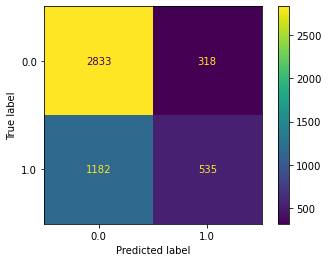

In [28]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#      'n_estimators':(10, 30, 50), #the number of trees
#      'max_depth':(4,5,6,8,10,15),
#      'min_samples_split': (2, 4, 8),
#      'min_samples_leaf': (4,8,12,16)
# }

# model = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
# model.fit(x_train, np.ravel(y_train))
# model.best_score_, model.best_params_